## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [5]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [19]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/resultados_kmeans_k2.csv', sep=';')
datos.head()

,edad,importe_solicitado,duracion_credito,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,situacion_vivienda_ALQUILER,...,estado_civil_DESCONOCIDO,estado_civil_DIVORCIADO,estado_civil_SOLTERO,estado_cliente_ACTIVO,estado_cliente_PASIVO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver,cluster
0,22,35000,3,59000,0.59,16.02,1,36.0,1088.0,True,...,False,False,False,True,False,True,False,False,False,0
1,21,1000,2,9600,0.10,11.14,0,39.0,1144.0,False,...,False,False,False,True,False,True,False,False,False,0
2,23,35000,2,65500,0.53,15.23,1,36.0,1887.0,True,...,False,False,False,True,False,True,False,False,False,0
3,24,35000,4,54400,0.55,14.27,1,54.0,1314.0,True,...,False,False,False,True,False,True,False,False,False,0
4,21,2500,2,9900,0.25,7.14,1,34.0,1171.0,False,...,True,False,False,True,False,True,False,False,False,0


In [20]:
#Muestro las columnas de las que dispongo
datos.columns

Index(['edad', 'importe_solicitado', 'duracion_credito', 'ingresos',
       'pct_ingreso', 'tasa_interes', 'estado_credito', 'antiguedad_cliente',
       'gastos_ult_12m', 'situacion_vivienda_ALQUILER',
       'situacion_vivienda_HIPOTECA', 'situacion_vivienda_OTROS',
       'situacion_vivienda_PROPIA', 'objetivo_credito_EDUCACIÓN',
       'objetivo_credito_INVERSIONES', 'objetivo_credito_MEJORAS_HOGAR',
       'objetivo_credito_PAGO_DEUDAS', 'objetivo_credito_PERSONAL',
       'objetivo_credito_SALUD', 'falta_pago_N', 'falta_pago_Y',
       'estado_civil_CASADO', 'estado_civil_DESCONOCIDO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTERO',
       'estado_cliente_ACTIVO', 'estado_cliente_PASIVO', 'nivel_tarjeta_Blue',
       'nivel_tarjeta_Gold', 'nivel_tarjeta_Platinum', 'nivel_tarjeta_Silver',
       'cluster'],
      dtype='object')

### Armado de los sets de entrenamiento y testeo

In [21]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO',
       'nivel_tarjeta_Blue', 'nivel_tarjeta_Gold', 'nivel_tarjeta_Platinum', 'nivel_tarjeta_Silver']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,situacion_vivienda_ALQUILER,...,estado_civil_CASADO,estado_civil_DESCONOCIDO,estado_civil_DIVORCIADO,estado_civil_SOLTERO,estado_cliente_ACTIVO,estado_cliente_PASIVO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver
0,22,35000,3,59000,0.59,16.02,1,36.0,1088.0,True,...,True,False,False,False,True,False,True,False,False,False
1,21,1000,2,9600,0.10,11.14,0,39.0,1144.0,False,...,True,False,False,False,True,False,True,False,False,False
2,23,35000,2,65500,0.53,15.23,1,36.0,1887.0,True,...,True,False,False,False,True,False,True,False,False,False
3,24,35000,4,54400,0.55,14.27,1,54.0,1314.0,True,...,True,False,False,False,True,False,True,False,False,False
4,21,2500,2,9900,0.25,7.14,1,34.0,1171.0,False,...,False,True,False,False,True,False,True,False,False,False


In [22]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,situacion_vivienda_ALQUILER,...,estado_civil_CASADO,estado_civil_DESCONOCIDO,estado_civil_DIVORCIADO,estado_civil_SOLTERO,estado_cliente_ACTIVO,estado_cliente_PASIVO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver
0,22,35000,3,59000,0.59,16.02,1,36.0,1088.0,True,...,True,False,False,False,True,False,True,False,False,False
1,21,1000,2,9600,0.10,11.14,0,39.0,1144.0,False,...,True,False,False,False,True,False,True,False,False,False
2,23,35000,2,65500,0.53,15.23,1,36.0,1887.0,True,...,True,False,False,False,True,False,True,False,False,False
3,24,35000,4,54400,0.55,14.27,1,54.0,1314.0,True,...,True,False,False,False,True,False,True,False,False,False
4,21,2500,2,9900,0.25,7.14,1,34.0,1171.0,False,...,False,True,False,False,True,False,True,False,False,False


In [23]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [24]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                 26.0
importe_solicitado                 6000.0
duracion_credito                      2.0
ingresos                          59760.0
pct_ingreso                           0.1
tasa_interes                         9.99
estado_credito                        0.0
antiguedad_cliente                   36.0
gastos_ult_12m                     7836.0
situacion_vivienda_ALQUILER         False
situacion_vivienda_HIPOTECA          True
situacion_vivienda_OTROS            False
situacion_vivienda_PROPIA           False
objetivo_credito_EDUCACIÓN          False
objetivo_credito_INVERSIONES        False
objetivo_credito_MEJORAS_HOGAR       True
objetivo_credito_PAGO_DEUDAS        False
objetivo_credito_PERSONAL           False
objetivo_credito_SALUD              False
falta_pago_N                         True
falta_pago_Y                        False
estado_civil_CASADO                 False
estado_civil_DESCONOCIDO            False
est

In [25]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [26]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [29]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #2 - Kmeans K=2")
mlflow.autolog()

2024/05/04 18:09:22 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #2 - Kmeans K=2' does not exist. Creating a new experiment.


2024/05/04 18:09:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/04 18:09:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\victo\Desktop\MasterTrabajos\13MBID\13MBID\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [31]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/04 18:09:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\victo\Desktop\MasterTrabajos\13MBID\13MBID\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.9992082343626286
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2361
           1       0.99      0.99      0.99       165

    accuracy                           1.00      2526
   macro avg       1.00      1.00      1.00      2526
weighted avg       1.00      1.00      1.00      2526

Matriz de confusión:


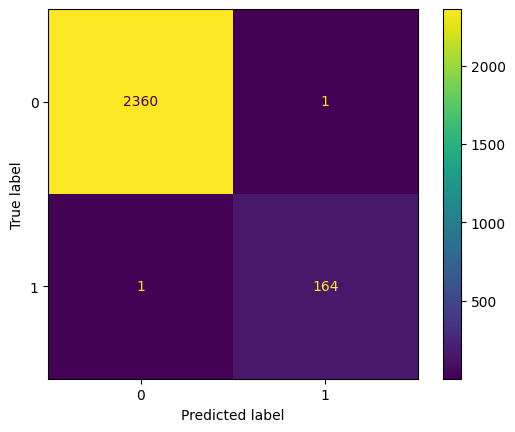

In [32]:
evaluar_modelo(dtc, test_data, test_labels)

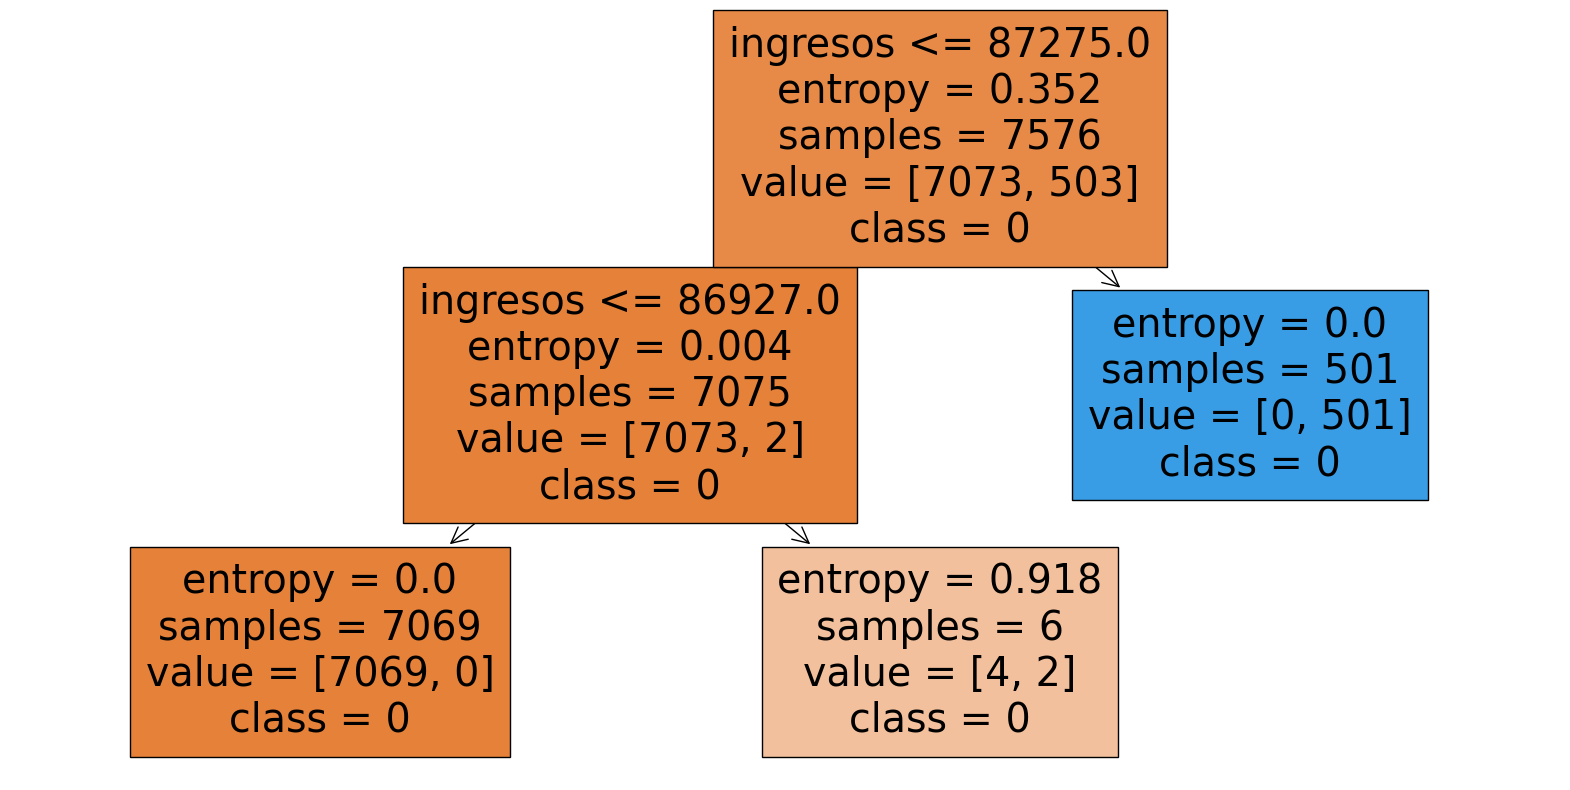

In [33]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()